In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af
from analysis import stats

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Base unet - best performing network
BASE_UNET = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/unet_2d/original_akshaysc/test_results'

# Non-fine-tuned unet - unet without any fine-tuning
NON_FT_UNET = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/unet_2d/2018-11-02-22-46-40/test_results'

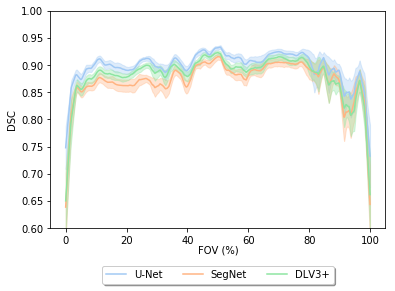

DSC
F-value: 16.9653
p-value: 0.0002
Dunn: 
           U-Net    SegNet     DLV3+
U-Net  -1.000000  0.000129  0.041614
SegNet  0.000129 -1.000000  0.309091
DLV3+   0.041614  0.309091 -1.000000

VOE
F-value: 16.7810
p-value: 0.0002
Dunn: 
           U-Net    SegNet     DLV3+
U-Net  -1.000000  0.000140  0.045293
SegNet  0.000140 -1.000000  0.302378
DLV3+   0.045293  0.302378 -1.000000

CV
F-value: 2.9478
p-value: 0.2290



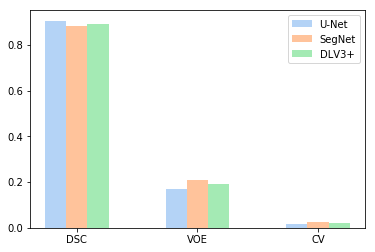

In [3]:
# Architecture result paths
ARCH_UNET = BASE_UNET
ARCH_SEGNET = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/segnet_2d/2018-09-01-22-39-39/fine_tune/test_results'
ARCH_DEEPLAB = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/deeplabv3_2d/2018-09-26-19-07-53/fine_tune/test_results/16_2-4-6'
ARCHS = {'filename': 'architecture',
         'keys': ['U-Net', 'SegNet', 'DLV3+'],
         'U-Net': ARCH_UNET, 'SegNet': ARCH_SEGNET, 'DLV3+': ARCH_DEEPLAB}
af.graph_slice_exp(ARCHS, True, title='')

stats.kruskal_dunn_analysis([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'], 'stats-arch')
stats.compare_metrics([ARCH_UNET, ARCH_SEGNET, ARCH_DEEPLAB], ARCHS['keys'], 'stats-arch')

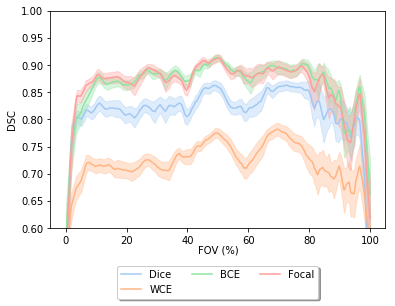

DSC
F-value: 73.6536
p-value: 0.0000
Dunn: 
           Dice           WCE           BCE         Focal
Dice  -1.000000  3.454052e-04  8.681295e-03  2.749372e-03
WCE    0.000345 -1.000000e+00  3.414354e-12  3.124188e-13
BCE    0.008681  3.414354e-12 -1.000000e+00  1.000000e+00
Focal  0.002749  3.124188e-13  1.000000e+00 -1.000000e+00

VOE
F-value: 73.6096
p-value: 0.0000
Dunn: 
           Dice           WCE           BCE         Focal
Dice  -1.000000  3.396291e-04  9.257175e-03  2.687615e-03
WCE    0.000340 -1.000000e+00  3.802052e-12  2.893493e-13
BCE    0.009257  3.802052e-12 -1.000000e+00  1.000000e+00
Focal  0.002688  2.893493e-13  1.000000e+00 -1.000000e+00

CV
F-value: 63.1345
p-value: 0.0000
Dunn: 
               Dice           WCE           BCE         Focal
Dice  -1.000000e+00  1.362616e-09  1.000000e+00  1.000000e+00
WCE    1.362616e-09 -1.000000e+00  2.956282e-11  6.005019e-09
BCE    1.000000e+00  2.956282e-11 -1.000000e+00  1.000000e+00
Focal  1.000000e+00  6.005019e-09  1.00

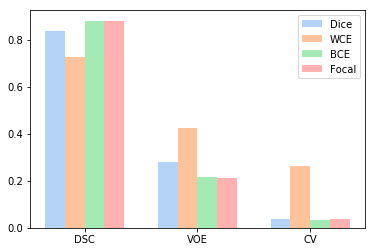

In [4]:
# Loss function result paths
LOSS_DSC = NON_FT_UNET
LOSS_WCE = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-21-00-49-34/test_results'
#LOSS_BCE = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-21-15-54-44/test_results'
LOSS_BCE = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-28-06-23-04/test_results'
LOSS_FOCAL = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-11-09-07-23-00/test_results'
LOSSES = {'filename': 'losses',
          'keys': ['Dice', 'WCE', 'BCE', 'Focal'],
          'Dice': LOSS_DSC, 'WCE': LOSS_WCE, 'BCE': LOSS_BCE, 'Focal': LOSS_FOCAL}
af.graph_slice_exp(LOSSES, True, title='')

stats.kruskal_dunn_analysis([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'], 'stats-loss')
stats.compare_metrics([LOSS_DSC, LOSS_WCE, LOSS_BCE, LOSS_FOCAL], LOSSES['keys'], 'stats-loss')

DSC
F-value: 19.4363
p-value: 0.0000
Dunn: 
            aug   no aug
aug    -1.00000  0.00001
no aug  0.00001 -1.00000

VOE
F-value: 19.7959
p-value: 0.0000
Dunn: 
             aug    no aug
aug    -1.000000  0.000009
no aug  0.000009 -1.000000

CV
F-value: 2.2991
p-value: 0.1294



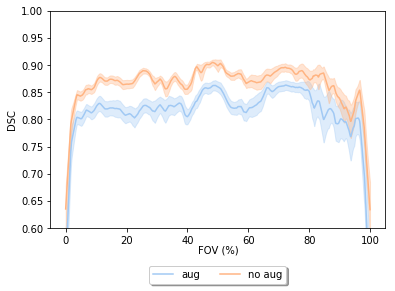

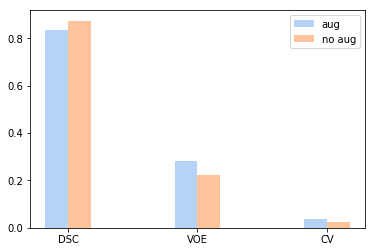

In [5]:
# Augmentation results
# Augmentation result paths
AUG_BASE_PATH = '/bmrNAS/people/arjun/msk_seg_networks/augment_limited/unet_2d/%s/test_results'
AUG_YES = NON_FT_UNET
AUG_NO = [AUG_BASE_PATH % '2018-10-05-04-17-05', AUG_BASE_PATH % '2018-10-05-16-52-29', AUG_BASE_PATH % '2018-10-07-00-27-34']
AUG_NO = [AUG_BASE_PATH % '2018-10-05-16-52-29', AUG_BASE_PATH % '2018-10-07-00-27-34']

AUGS = {'filename': 'augment',
        'keys': ['aug', 'no aug'],
        'aug': AUG_YES, 'no aug': AUG_NO}

af.graph_slice_exp(AUGS, title='')

stats.kruskal_dunn_analysis([AUG_YES, AUG_NO], AUGS['keys'], 'stats-aug')
stats.compare_metrics([AUG_YES, AUG_NO], AUGS['keys'], 'stats-aug')

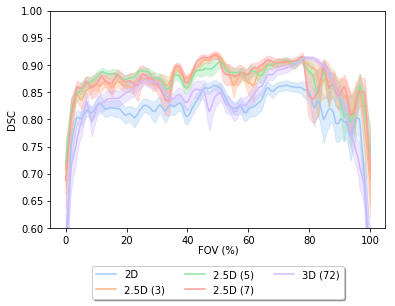

DSC
F-value: 33.8573
p-value: 0.0000
Dunn: 
                2D  2.5D (3)  2.5D (5)  2.5D (7)   3D (72)
2D       -1.000000  0.000136  0.000012  0.000034  0.137022
2.5D (3)  0.000136 -1.000000  1.000000  1.000000  0.594322
2.5D (5)  0.000012  1.000000 -1.000000  1.000000  0.165109
2.5D (7)  0.000034  1.000000  1.000000 -1.000000  0.293855
3D (72)   0.137022  0.594322  0.165109  0.293855 -1.000000

VOE
F-value: 34.1120
p-value: 0.0000
Dunn: 
                2D  2.5D (3)  2.5D (5)  2.5D (7)   3D (72)
2D       -1.000000  0.000120  0.000011  0.000031  0.129737
2.5D (3)  0.000120 -1.000000  1.000000  1.000000  0.583549
2.5D (5)  0.000011  1.000000 -1.000000  1.000000  0.168218
2.5D (7)  0.000031  1.000000  1.000000 -1.000000  0.292801
3D (72)   0.129737  0.583549  0.168218  0.292801 -1.000000

CV
F-value: 3.8085
p-value: 0.4325



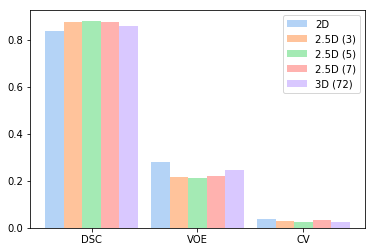

In [6]:
# TODO: inspect training/testing

VOLUME_2D = NON_FT_UNET
VOLUME_2_5D_3 = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_2_5d/2018-10-26-20-57-21/test_results' # 2.5D network with 3 slices (+/-1)
VOLUME_2_5D_5 = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_2_5d/2018-10-21-02-31-40/test_results' # 2.5D network with 5 slices (+/-2)
VOLUME_2_5D_7 = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_2_5d/2018-10-26-21-00-40/test_results' # 2.5D network with 7 slices (+/-3)
VOLUME_3D = '/bmrNAS/people/arjun/msk_seg_networks/volume_limited/unet_3d_asc/test_results' # 3D network with 4 slice inputs
VOLUMES = {'filename': 'volume',
         'keys': ['2D', '2.5D (3)', '2.5D (5)', '2.5D (7)', '3D (72)'],
         '2D': VOLUME_2D, '2.5D (3)': VOLUME_2_5D_3, '2.5D (5)': VOLUME_2_5D_5, '2.5D (7)': VOLUME_2_5D_7, '3D (72)': VOLUME_3D}

af.graph_slice_exp(VOLUMES, True, title='')
stats.kruskal_dunn_analysis([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D], VOLUMES['keys'], 'stats-volume')
stats.compare_metrics([VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, VOLUME_3D], VOLUMES['keys'], 'stats-volume')

        DSC          
r2, r - U-Net : 0.7455, 0.8634
r2, r - SegNet : 0.9483, 0.9738
r2, r - DLV3+ : 0.9678, 0.9837
        VOE          
r2, r - U-Net : 0.7473, 0.8645
r2, r - SegNet : 0.9791, 0.9895
r2, r - DLV3+ : 0.9793, 0.9896
        CV          
r2, r - U-Net : 0.3729, 0.6106
r2, r - SegNet : 0.8497, 0.9218
r2, r - DLV3+ : 0.8201, 0.9056


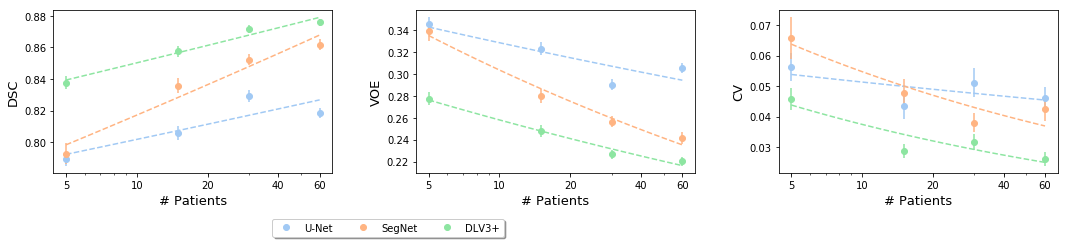

In [7]:
# Data limitation graphs
# Each architecture was run with multiple seeds

unet_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/unet_2d/%s/test_results'
segnet_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/segnet_2d/%s/test_results'
deeplab_data_limitation_path = '/bmrNAS/people/arjun/msk_seg_networks/data_limit/%03d/deeplabv3_2d/%s/test_results/16_2-4-6'

dl_unet = [ # Seed 1
            [unet_data_limitation_path % (5, '2018-10-07-18-27-21'), 
             unet_data_limitation_path % (15, '2018-10-07-22-44-24'), 
             unet_data_limitation_path % (30, '2018-10-08-05-08-59'),
             unet_data_limitation_path % (60, '2018-10-08-12-01-38')],

            # Seed 2
            [unet_data_limitation_path % (5, '2018-10-03-17-55-27'), 
             unet_data_limitation_path % (15, '2018-10-03-22-00-17'), 
             unet_data_limitation_path % (30, '2018-10-04-02-57-29'),
             unet_data_limitation_path % (60, '2018-10-04-07-55-55')],

            # Seed 3
            [unet_data_limitation_path % (5, '2018-10-04-18-27-40'), 
             unet_data_limitation_path % (15, '2018-10-04-23-12-14'), 
             unet_data_limitation_path % (30, '2018-10-05-04-41-17'),
             unet_data_limitation_path % (60, '2018-10-05-11-08-06')]
           ]

dl_segnet = [   # Seed 1
                [segnet_data_limitation_path % (5, '2018-10-04-07-34-20'), 
                 segnet_data_limitation_path % (15, '2018-10-04-15-12-54'), 
                 segnet_data_limitation_path % (30, '2018-10-04-21-31-03'),
                 segnet_data_limitation_path % (60, '2018-10-05-04-00-47')],

                # Seed 2
                [segnet_data_limitation_path % (5, '2018-10-11-19-23-53'), 
                 segnet_data_limitation_path % (15, '2018-10-12-03-04-00'), 
                 segnet_data_limitation_path % (30, '2018-10-12-09-45-22'),
                 segnet_data_limitation_path % (60, '2018-10-12-16-02-42')],

                # Seed 3
                [segnet_data_limitation_path % (5, '2018-10-05-16-08-09'), 
                 segnet_data_limitation_path % (15, '2018-10-06-00-07-38'), 
                 segnet_data_limitation_path % (30, '2018-10-26-06-21-11'),
                 segnet_data_limitation_path % (60, '2018-10-26-06-16-12')]
            ]


dl_deeplab = [  # Seed 1
                [deeplab_data_limitation_path % (5, '2018-10-02-23-21-01'), 
                 deeplab_data_limitation_path % (15, '2018-10-03-07-10-34'), 
                 deeplab_data_limitation_path % (30, '2018-10-03-14-11-30'),
                 deeplab_data_limitation_path % (60, '2018-10-03-20-35-06')],

                # Seed 2
                [deeplab_data_limitation_path % (5, '2018-10-11-19-25-15'), 
                 deeplab_data_limitation_path % (15, '2018-10-12-03-08-29'), 
                 deeplab_data_limitation_path % (30, '2018-10-12-10-24-21'),
                 deeplab_data_limitation_path % (60, '2018-10-12-16-56-59')],

                # Seed 3
                [deeplab_data_limitation_path % (5, '2018-10-07-17-36-29'), 
                 deeplab_data_limitation_path % (15, '2018-10-08-01-27-49'), 
                 deeplab_data_limitation_path % (30, '2018-10-08-08-39-38'),
                 deeplab_data_limitation_path % (60, '2018-10-08-15-33-20')]
              ]

data = {'filename': 'data_limitation', 'keys': ['U-Net', 'SegNet', 'DLV3+'], 
        'U-Net': dl_unet, 'SegNet': dl_segnet, 'DLV3+': dl_deeplab}

ov_data = {'dsc': data,
          'voe': data,
          'cvs': data}

# ov_data = {'dsc': data,
#           'voe': data}
af.graph_data_limitation(ov_data, 'data_limitation')